<h1>CS4618: Artificial Intelligence I</h1>
<h1>Gradient Descent</h1>
<h2>
    Derek Bridge<br>
    School of Computer Science and Information Technology<br>
    University College Cork
</h2>

<h1>Initialization</h1>
$\newcommand{\Set}[1]{\{#1\}}$ 
$\newcommand{\Tuple}[1]{\langle#1\rangle}$ 
$\newcommand{\v}[1]{\pmb{#1}}$ 
$\newcommand{\cv}[1]{\begin{bmatrix}#1\end{bmatrix}}$ 
$\newcommand{\rv}[1]{[#1]}$ 
$\DeclareMathOperator{\argmax}{arg\,max}$ 
$\DeclareMathOperator{\argmin}{arg\,min}$ 
$\DeclareMathOperator{\dist}{dist}$
$\DeclareMathOperator{\abs}{abs}$

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import add_dummy_feature

from sklearn.linear_model import SGDRegressor

<h1>Gradient Descent for OLS Regression</h1>
<ul>
    <li>We saw the basic idea &mdash; now, the details</li>
    <li>In fact, three variants:
        <ul>
            <li>Batch Gradient Descent</li>
            <li>Stochastic Gradient Descent</li>
            <li>Mini-batch Gradient Descent</li>
        </ul>
    </li>
</ul>

<h1>Partial Derivatives</h1>
<ul>
    <li>We need the <b>gradient</b> of the loss function with regards to each $\v{\beta}_j$
        <ul>
            <li>In other words, how much the loss will change if we change $\v{\beta}_j$ a little</li>
            <li>With respect to a particular $\v{\beta}_j$, it is called the <b>partial derivative</b>
        </ul>
    </li>
    <li>Without doing the calculus, the partial derivatives of $J(\v{X}, \v{y}, \v{\beta})$ with respect to
        $\v{\beta}_j$ are
        $$\frac{\partial J(\v{X}, \v{y}, \v{\beta})}{\partial\v{\beta}_j} = 
          \frac{1}{m}\sum_{i=1}^m(\v{x}^{(i)}\v{\beta} - \v{y}^{(i)}) \times \v{x}_j^{(i)}$$
    </li>
    <li>The <b>gradient vector</b>, $\nabla_{\v{\beta}}J(\v{X}, \v{y}, \v{\beta})$, is a vector
        of each partial derivative:
        $$\nabla_{\v{\beta}}J(\v{X}, \v{y}, \v{\beta}) = 
            \cv{\frac{\partial J(\v{X}, \v{y}, \v{\beta})}{\partial\v{\beta}_0}\\ 
              \frac{\partial J(\v{X}, \v{y}, \v{\beta})}{\partial\v{\beta}_1}\\ 
              \vdots\\ 
              \frac{\partial J(\v{X}, \v{y}, \v{\beta})}{\partial\v{\beta}_n}}
        $$
     </li>
     <li>And there is a vectorized way to compute it:
         $$\nabla_{\v{\beta}}J(\v{X}, \v{y}, \v{\beta}) = \frac{1}{m}\v{X}^T(\v{X}\v{\beta} - \v{y})$$
     </li>
</ul>

<h1>Gradient Descent, Again</h1>
<ul>
    <li>Recap:
        <ul>
            <li>
                 It starts with an initial guess for the values of the parameters 
            </li>
            <li>
                Then repeatedly:
                <ul>
                    <li>It updates the parameter values  &mdash; hopefully to reduce the loss
                    </li>
                </ul>
            </li>
        </ul>
     </li>
     <li>But now we know how to update the parameter values to reduce the loss:
         <ul>
             <li>Compute the gradient vector
                 <ul>
                     <li>But this points 'uphill' and we want to go 'downhill'</li>
                     <li>And we want to make 'baby steps', so we use the learning rate, $\alpha$, which
                         is between 0 and 1
                     </li>
                 </ul>
             </li>
             <li>So subtract the $\alpha$ times the gradient vector from $\v{\beta}$</li>
         </ul>
         $$\v{\beta} \gets \v{\beta} - \alpha\nabla_{\v{\beta}}J(\v{X}, \v{y}, \v{\beta})$$
         Or
         $$\v{\beta} \gets \v{\beta} - \frac{\alpha}{m}\v{X}^T(\v{X}\v{\beta} - \v{y})$$
     </li>
     <li>(BTW, this is vectorized. Naive loop implementations are wrong: they lose the
         <em>simultaneous</em> update of the $\v{\beta}_j$)
     </li>
</ul>

<h1>Batch Gradient Descent</h1>
<ul>
    <li>Pseudocode:
        <ul style="background: lightgrey; list-style: none">
            <li>initialize $\v{\beta}$ randomly
            <li>
                repeat until convergence
                <ul>
                    <li>
                        $\v{\beta} \gets \v{\beta} - \frac{\alpha}{m}\v{X}^T(\v{X}\v{\beta} - \v{y})$
                    </li>
                </ul>
             </li>
        </ul>
    </li>
    <li>Why is it called <em>Batch</em> Gradient Descent?
        <ul>
            <li>The update involves a calculation over the <em>entire</em> training set $\v{X}$
                on every iteration
            </li>
            <li>This can be slow for large training sets</li>
        </ul>
    </li>
</ul>

<h2>Batch Gradient Descent in numpy</h2>
<ul>
    <li>For the hell of it, let's implement it ourselves</li>
    <li>(We'll be naughty: we'll train on the whole dataset)</li>
</ul>

In [4]:
# Loss function for OLS regression (assumes X contains all 1s in its first column)
def J(X, y, beta):
    return np.mean((X.dot(beta) - y) ** 2) / 2.0

In [49]:
def batch_gradient_descent_for_ols_linear_regression(X, y, alpha, num_iterations):
    
    m, n = X.shape
    beta = np.random.randn(n) 
    Jvals = np.zeros(num_iterations)
    
    for iter in range(num_iterations):
        beta -= (1.0 * alpha / m) * X.T.dot(X.dot(beta) - y)
        Jvals[iter] = J(X, y, beta)
 
    return beta, Jvals

In [50]:
# Use pandas to read the CSV file
df = pd.read_csv("datasets/dataset_corkA.csv")

# Get the feature-values and the target values 
X_without_dummy_unscaled = df[["flarea", "bdrms", "bthrms"]].values
y = df["price"].values

# Scale it
scaler = StandardScaler()
X_without_dummy = scaler.fit_transform(X_without_dummy_unscaled)

# Add the extra column to X
X = add_dummy_feature(X_without_dummy)

# Run the Batch Gradient Descent
beta, Jvals = batch_gradient_descent_for_ols_linear_regression(X, y, alpha = 0.03, num_iterations = 1000)

# Display beta
beta

array([ 274.72463768,  140.91111676,   10.20466646,   -0.78810177])

<ul>
    <li>Bear in mind that the coefficients it finds are on the scaled data</li>
</ul>

<ul>
    <li>It's a good idea to plot the values of the loss function against the number of iterations
    </li>
    <li>If its value ever increases, then
        <ul>
            <li>
                the code might be incorrect (I think it's OK!)
            </li>
            <li>
                the value of $\alpha$ is too big and is causing divergence
            </li>
        </ul>
    </li>
</ul>

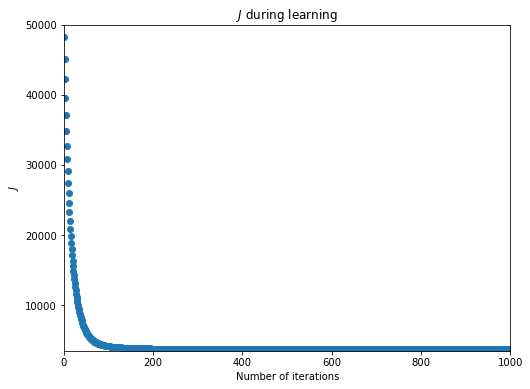

In [51]:
fig = plt.figure(figsize=(8,6))
plt.title("$J$ during learning")
plt.xlabel("Number of iterations")
plt.xlim(1, Jvals.size)
plt.ylabel("$J$")
plt.ylim(3500, 50000)
xvals = np.linspace(1, Jvals.size, Jvals.size)
plt.scatter(xvals, Jvals)
plt.show()

<ul>
    <li>The algorithm gives us the problem of choosing the number of iterations</li>
    <li>An alternative is to use a very large number of iterations but exit when the gradient vector
        becomes tiny:
        <ul>
            <li>when its norm becomes smaller than <b>tolerance</b>, $\eta$</li>
        </ul>
    </li>
</ul>

<ul>
    <li>Try it without scaling:</li>
</ul>

In [52]:
# Get the feature-values and the target values 
X_without_dummy = df[["flarea", "bdrms", "bthrms"]].values
y = df["price"].values

# Add the extra column to X
X = add_dummy_feature(X_without_dummy)

# Run the Batch Gradient Descent
beta, Jvals = batch_gradient_descent_for_ols_linear_regression(X, y, alpha = 0.03, num_iterations = 4000)

# Display beta
beta

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in subtract


array([ nan,  nan,  nan,  nan])

<ul>
    <li>How can you get it to work?</li>
</ul>

<ul>
    <li>
        Some people suggest a variant of Batch Gradient Descent in which the value of $\alpha$ is decreased
        over time, i.e. its value in later iterations is smaller
        <ul>
            <li>Why do they suggest this? </li>
            <li>And why isn't it necessary?
            </li>
        </ul>
    </li>
    <li>(But, we'll revisit this idea in Stochastic Gradient Descent)</li>
</ul>

<h1>Stochastic Gradient Descent</h1>
<ul>
    <li>As we saw, Batch Gradient Descent can be slow on large training sets</li>
    <li><b>Stochastic Gradient Descent (SGD)</b>:
        <ul>
            <li>On each iteration, it picks just <em>one</em> training example $\v{x}$ at random and computes 
                the gradients on just that
                one example
                $$\v{\beta} \gets \v{\beta} - \alpha\v{x}^T(\v{x}\v{\beta} - \v{y})$$
            </li>
        </ul>
    </li>
    <li>This gives huge speed-up</li>
    <li>It enables us to train on huge training sets since only one example needs to be in memory in each iteration</li>
    <li>But, because it is stochastic (the randomness), the loss will not necessarily decrease on each iteration:
        <ul>
            <li><em>On average</em>, the loss decreases, but in any one iteration, loss may go up or down</li>
            <li>Eventually, it will get close to the minimum, but it will continue to go up and down a bit
                <ul>
                    <li>So, once you stop it, the $\v{\beta}$ will be close to the best, but not necessarily optimal</li>
                </ul>
            </li>
            <li>Ironically, if you have a local minimum (which, with OLS regression, we don't), SGD might even escape the
                local minimum, and might even get to the global minimum
            </li>
        </ul>
    </li>
</ul>

<h2>Simulated Annealing</h2>
<ul>
    <li>As we discussed, SGD does not settle at the minimum</li>
    <li>One solution is to gradually reduce the learning rate
        <ul>
            <li>Updates start out 'large' so you make progress and can escape local minima</li>
            <li>But, over time, updates get smaller, allowing SGD to settle at the global minimum</li>
        </ul>
    </li>
    <li>The function that determines how to reduce the learning rate is called the <b>learning schedule</b>
        <ul>
            <li>Reduce it too quickly and you may get stuck in a local  minimum or en route to the global minimum</li>
            <li>Reduce it too slowly and you may bounce around a lot and, if stopped after too few iterations, may end up
                with a suboptimal solution
            </li>
        </ul>
    </li>
</ul>

<h2>SGD in scikit-learn</h2>
<ul>
    <li>The <code>fit</code> method of scikit-learn's <code>SGDRegressor</code> class is doing
        what we have described:
        <ul>
            <li>You must scale the features but it inserts the extra column of 1s</li>
            <li>You can supply a <code>learning_rate</code> and lots of other things
                (in the code below, we'll just use the defaults)
            </li>
        </ul>
    </li>
    <li>(In the code below, we'll be naughty: we'll train on the whole dataset)</li>
</ul>

In [53]:
# Use pandas to read the CSV file
df = pd.read_csv("datasets/dataset_corkA.csv")

# Get the feature-values and the target values 
X_unscaled = df[["flarea", "bdrms", "bthrms"]].values
y = df["price"].values

# Scale it
scaler = StandardScaler()
X = scaler.fit_transform(X_unscaled)

# Create the SGDRegressor and fit the model
sgd = SGDRegressor()
sgd.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

<h2>SGD in numpy</h2>
<ul>
    <li>For the hell of it, let's implement a simple version ourselves</li>
    <li>(Again, we'll be naughty: we'll train on the whole dataset)</li>
</ul>

In [56]:
def stochastic_gradient_descent_for_ols_linear_regression(X, y, alpha, num_epochs):
    
    m, n = X.shape
    beta = np.random.randn(n) 
    Jvals = np.zeros(num_epochs * m)
    
    for epoch in range(num_epochs):
        for i in range(m):
            rand_idx = np.random.randint(m)
            xi = X[rand_idx:rand_idx + 1]
            yi = y[rand_idx:rand_idx + 1]
            beta -= alpha * xi.T.dot(xi.dot(beta) - yi)
            Jvals[epoch * m + i] = J(X, y, beta)
 
    return beta, Jvals

In [57]:
# Use pandas to read the CSV file
df = pd.read_csv("datasets/dataset_corkA.csv")

# Get the feature-values and the target values 
X_without_dummy_unscaled = df[["flarea", "bdrms", "bthrms"]].values
y = df["price"].values

# Scale it
scaler = StandardScaler()
X_without_dummy = scaler.fit_transform(X_without_dummy_unscaled)

# Add the extra column to X
X = add_dummy_feature(X_without_dummy)

# Run the Stochastic Gradient Descent
beta, Jvals = stochastic_gradient_descent_for_ols_linear_regression(X, y, alpha = 0.03, num_epochs = 50)

# Display beta
beta

array([ 275.78125157,  121.2149965 ,   36.83866659,  -16.55484846])

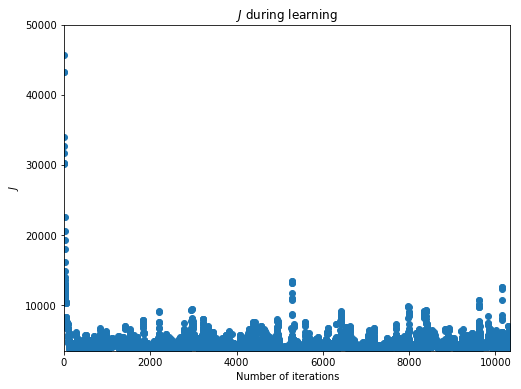

In [58]:
fig = plt.figure(figsize=(8,6))
plt.title("$J$ during learning")
plt.xlabel("Number of iterations")
plt.xlim(1, Jvals.size)
plt.ylabel("$J$")
plt.ylim(3500, 50000)
xvals = np.linspace(1, Jvals.size, Jvals.size)
plt.scatter(xvals, Jvals)
plt.show()

<ul>
    <li>Quite a bumpy ride!</li>
    <li>So, let's try simuated annealingL</li>
</ul>

In [59]:
def learning_schedule(t):
    return 5 / (t + 50)
    
def stochastic_gradient_descent_for_ols_linear_regression(X, y, num_epochs):
    
    m, n = X.shape
    beta = np.random.randn(n) 
    Jvals = np.zeros(num_epochs * m)
    
    for epoch in range(num_epochs):
        for i in range(m):
            rand_idx = np.random.randint(m)
            xi = X[rand_idx:rand_idx + 1]
            yi = y[rand_idx:rand_idx + 1]
            alpha = learning_schedule(epoch * m + i)
            beta -= alpha * xi.T.dot(xi.dot(beta) - yi)
            Jvals[epoch * m + i] = J(X, y, beta)
 
    return beta, Jvals

In [60]:
# Use pandas to read the CSV file
df = pd.read_csv("datasets/dataset_corkA.csv")

# Get the feature-values and the target values 
X_without_dummy_unscaled = df[["flarea", "bdrms", "bthrms"]].values
y = df["price"].values

# Scale it
scaler = StandardScaler()
X_without_dummy = scaler.fit_transform(X_without_dummy_unscaled)

# Add the extra column to X
X = add_dummy_feature(X_without_dummy)

# Run the Stochastic Gradient Descent
beta, Jvals = stochastic_gradient_descent_for_ols_linear_regression(X, y, num_epochs = 50)

# Display beta
beta

array([  2.75318942e+02,   1.38082587e+02,   1.36263924e+01,
         2.07068421e-01])

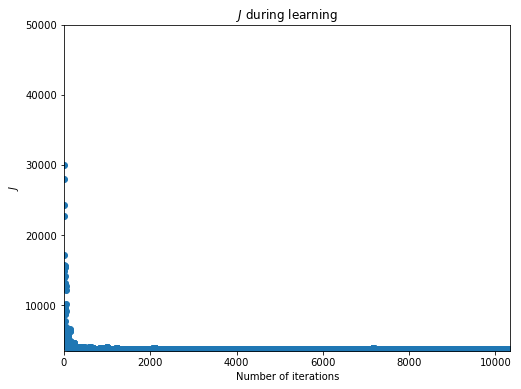

In [61]:
fig = plt.figure(figsize=(8,6))
plt.title("$J$ during learning")
plt.xlabel("Number of iterations")
plt.xlim(1, Jvals.size)
plt.ylabel("$J$")
plt.ylim(3500, 50000)
xvals = np.linspace(1, Jvals.size, Jvals.size)
plt.scatter(xvals, Jvals)
plt.show()

<h1>Mini-Batch Gradient Descent</h1>
<ul>
    <li>Batch Gradient Descent computed gradients from the full training set</li>
    <li>Stochastic Gradient Descent computed gradients from just one example</li>
    <li>Mini-Batch Gradient Descent lies between the two:
        <ul>
            <li>It computes gradients from a small randomly-selected subset of the training set, called a
                <b>mini-batch</b>
            </li>
        </ul>
    </li>
    <li>Since it lies between the two:
        <ul>
            <li>It may bounce less and get closer to the global minimum than SGD
                <ul>
                    <li>Although both of them can reach the global minimum with a good learning schedule</li>
                </ul>
            </li>
            <li>But it may be harder to escape local minima, if you have them (which, for OLS, we don't)</li>
            <li>And its time and memory costs lie between the two</li>
        </ul>
    </li>
</ul>

<h1>The Normal Equation versus Gradient Descent</h1>
<ul>
    <li>Efficiency/scaling-up
        <ul>
            <li>Normal Equation 
                <ul>
                    <li>is linear in $m$, so can handle large training sets efficiently if they fit into
                        main memory
                    </li>
                    <li>but it has to compute the inverse (or psueudo-inverse) of a $n \times n$ matrix, which takes
                        time between quadratic and cubic in $n$, and so is only feasible for smallish $n$ (up to
                        a few thousand)
                    </li>
                </ul>
            </li>
            <li>Gradient Descent
                <ul>
                    <li>SGD scales really well to huge $m$</li>
                    <li>And all three Gradient Descent methods can handle huge $n$ (even 100s of 1000s)</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Finding the global minimum for OLS regression
        <ul>
            <li>Normal Equation: guaranteed to find the global minimum</li>
            <li>Gradient Descent: all a bit dependent on number of iterations, learning rate, learning schedule</li>
        </ul>
    </li>
    <li>Feature scaling:
        <ul>
            <li>Normal Equation: scaling is not needed
                <ul>
                    <li>(In fact, I find that scikit-learn's <code>LinearRegression</code> class produces weird
                        results if I do any scaling. I don't know why. So don't do it!)
                    </li>
                </ul>   
            </li>
            <li>Gradient Descent: scaling <em>is</em> needed</li>
        </ul>
    </li>
    <li>Finally, Gradient Descent is a general method, whereas the Normal Equation is only for OLS regression</li>
</ul>

<h1>Logicstic Regression</h1>
<ul>
    <li>So what about classification using logistic regression?</li>
    <li>We have a different loss function (cross entropy)
        <ul>
            <li>Happily, it is convex</li>
            <li>But there is no equivalent to the Normal Equation, so we <em>must</em> use Gradient Descent</li>
            <li>Not that it matters, but here is the partial derivative of its loss function with respect to $\v{\beta}_i$
                (binary classification)
                $$\frac{\partial J}{\partial\v{\beta}_j} =
                  \frac{1}{m}\sum_{i=1}^m(\v{x}^{(i)})\v{\beta} - \v{y}^{(i)}) \times \v{x}_j^{(i)}$$
            </li>
        </ul>
    </li>
    <li>scikit-learn has the class <code>LogisticRegression</code>, but also <code>SGDClassifier</code> if you
        want more control
    </li>
</ul>

<h1>After Christmas&hellip;</h1>
<ul>
    <li>Here endeth CS4618</li>
    <li>What will we do in CS4619?
        <ul>
            <li>We will study some more complex models (i.e. non-linear ones)</li>
            <li>We will study underfitting and overfitting, and solutions to these</li>
            <li>This will lead into Neural Networks</li>
            <li>From there, we will study so-called Deep Learning for regression and classification, including
                for images
            </li>
            <li>We will generalize to problems such as sequence to vector, vector to sequence and sequence to sequences
                such as machine translation, speech recognition,&hellip;
            </li>
            <li>We will reviste Reinforcement Learning</li>
            <li>We will consider knowledge representation and reasoning</li>
        </ul>
        It'll be tough but brilliant
    </li>
</ul>